In [7]:
import MDAnalysis as mda
import warnings
# suppress some MDAnalysis warnings about PSF files
warnings.filterwarnings('ignore')
from MDAnalysis.analysis import align
import nglview as nv
from MDAnalysis.analysis import rms
from MDAnalysis.analysis import dihedrals
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
# Initialize Universe with Gromacs files
u = mda.Universe('npt_modified.gro', 'centered_nojump_md.xtc')

# Select ct_alpha and ct_beta
ct_alpha = u.select_atoms('bynum 4368:4505')
ct_beta = u.select_atoms('bynum 8802:9035')

# Select the MTBD helices
mtbd_selections = {
    'MTBD-H1': u.select_atoms('resid 3301:3309'),
    'MTBD-H2': u.select_atoms('resid 3315:3329'),
    'MTBD-H3': u.select_atoms('resid 3335:3341'),
    'MTBD-H4': u.select_atoms('resid 3347:3352'),
    'MTBD-H5': u.select_atoms('resid 3361:3370'),
    'MTBD-H7': u.select_atoms('resid 3379:3385'),
}

In [8]:
# Dataframe to store dCOM results
df = pd.DataFrame()

# Time in ps
time = None

# Loop over each MTBD selection
for selection_name, selection in mtbd_selections.items():
    dcom_values_alpha = []
    dcom_values_beta = []
    for ts in u.trajectory:
        dcom_alpha = np.linalg.norm(ct_alpha.center_of_mass() - selection.center_of_mass())
        dcom_beta = np.linalg.norm(ct_beta.center_of_mass() - selection.center_of_mass())
        dcom_values_alpha.append(dcom_alpha)
        dcom_values_beta.append(dcom_beta)
    time = np.arange(len(dcom_values_alpha)) * u.trajectory.dt / 1000  # time in ns
    df[selection_name + ' Alpha DCOM (Å)'] = dcom_values_alpha
    df[selection_name + ' Beta DCOM (Å)'] = dcom_values_beta

zoomed in graphs


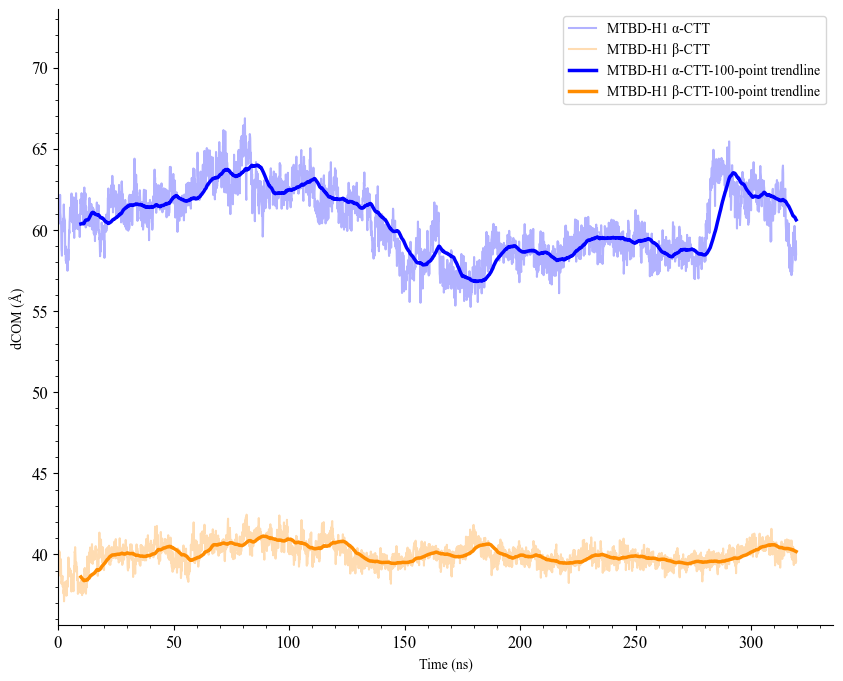

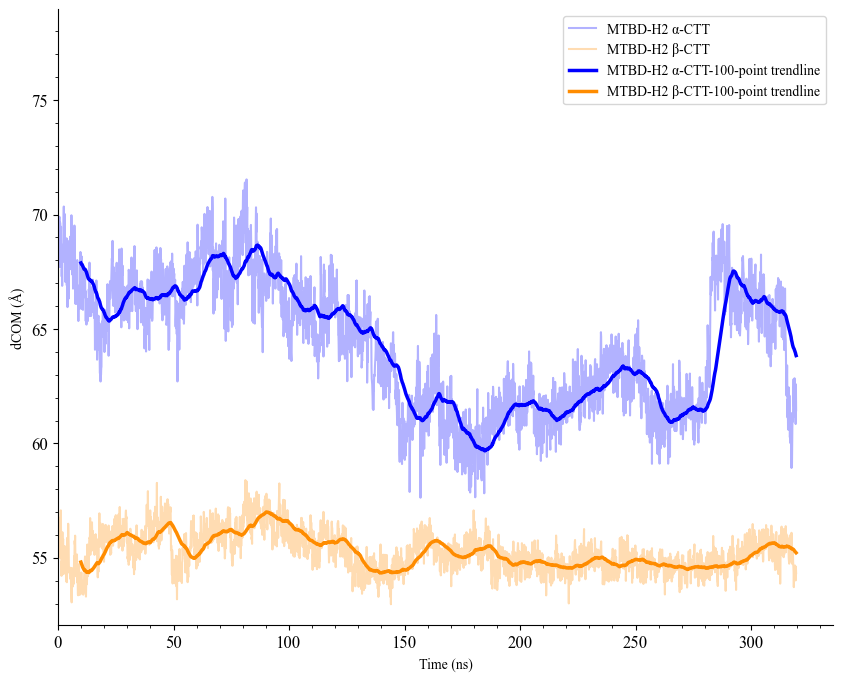

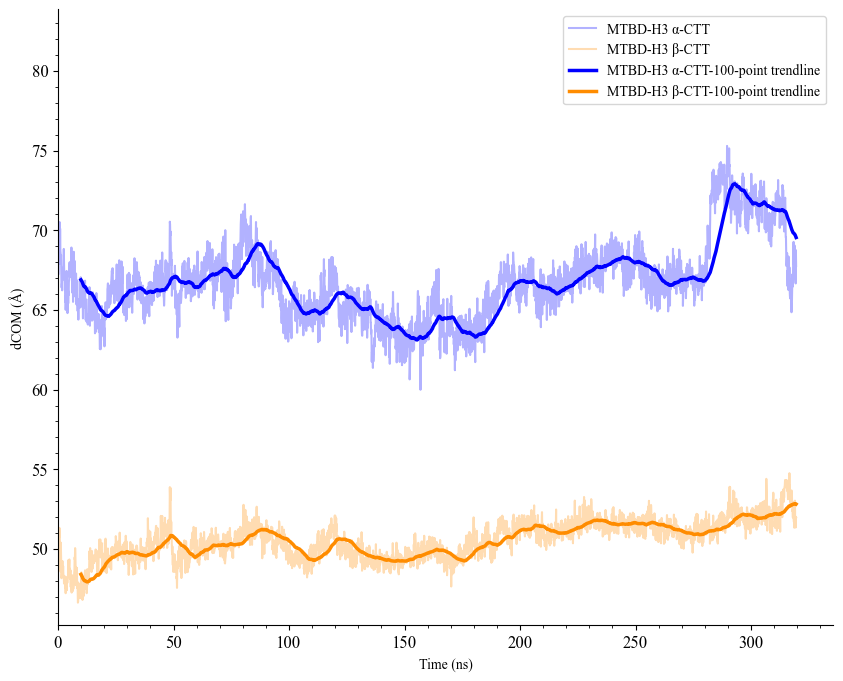

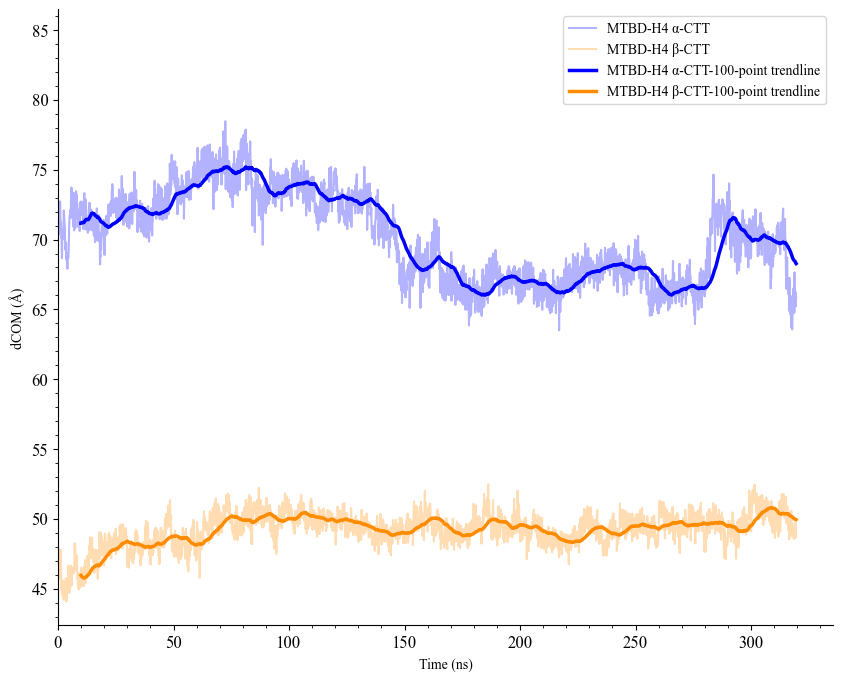

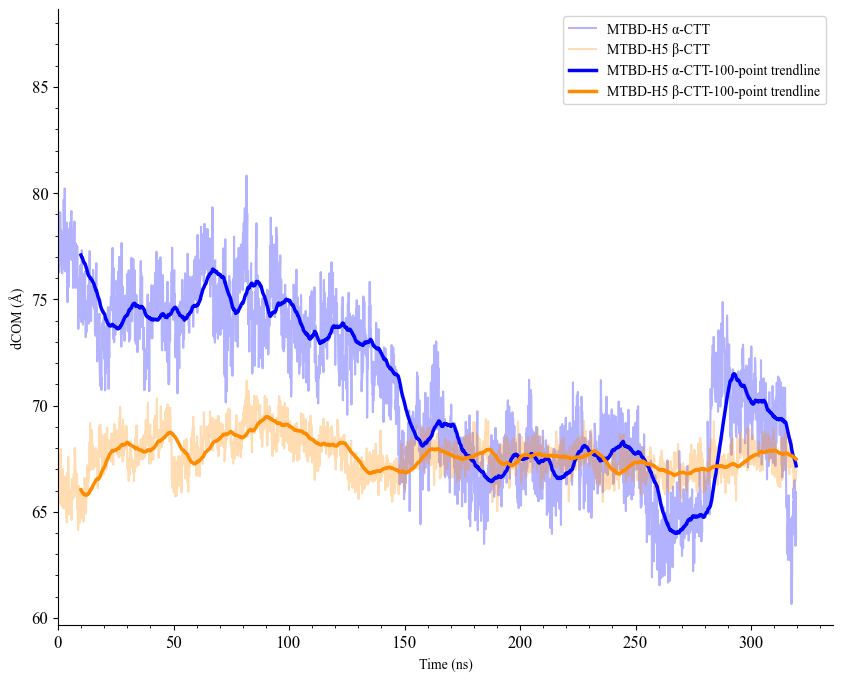

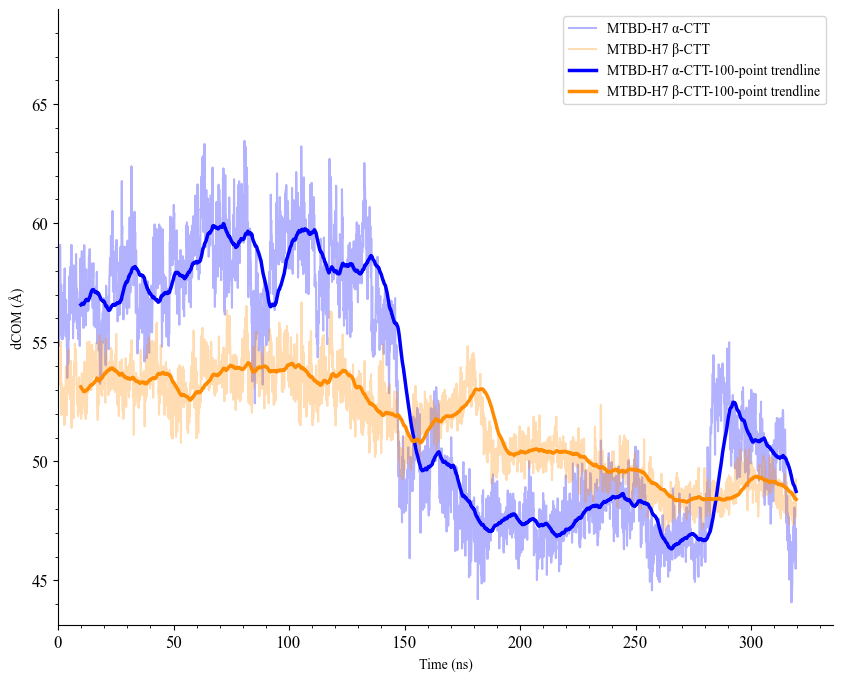

In [20]:
import matplotlib.ticker as ticker
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Times New Roman'

print('zoomed in graphs')

# Append time to df
df['Time (ns)'] = time

# Smooth and plot DCOM for each selection
window_size = 100  # Change the window size to 100 for smoothing
for selection_name in mtbd_selections.keys():
    df['Smoothed ' + selection_name + ' Alpha DCOM (Å)'] = df[selection_name + ' Alpha DCOM (Å)'].rolling(window=window_size).mean()
    df['Smoothed ' + selection_name + ' Beta DCOM (Å)'] = df[selection_name + ' Beta DCOM (Å)'].rolling(window=window_size).mean()

    # Get maximum y value
    y_max = max(df['Smoothed ' + selection_name + ' Alpha DCOM (Å)'].max(), df['Smoothed ' + selection_name + ' Beta DCOM (Å)'].max()) * 1.15

    # Create the figure and axes
    fig, ax = plt.subplots()
    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('dCOM (Å)')

    # Set figure size
    fig.set_size_inches(10, 8)

    # Set major and minor ticks
    ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
    
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Turn off the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Plot the original DCOM values using seaborn with reduced opacity
    sns.lineplot(x='Time (ns)', y=selection_name + ' Alpha DCOM (Å)', data=df, ax=ax, color='blue', alpha=0.3, label=selection_name + ' α-CTT')
    sns.lineplot(x='Time (ns)', y=selection_name + ' Beta DCOM (Å)', data=df, ax=ax, color='darkorange', alpha=0.3, label=selection_name + ' β-CTT')

# Plot the smoothed DCOM values using seaborn with increased line width
    sns.lineplot(x='Time (ns)', y='Smoothed ' + selection_name + ' Alpha DCOM (Å)', data=df, ax=ax, label=selection_name + ' α-CTT-100-point trendline', color='blue', linewidth=2.5)
    sns.lineplot(x='Time (ns)', y='Smoothed ' + selection_name + ' Beta DCOM (Å)', data=df, ax=ax, label=selection_name + ' β-CTT-100-point trendline', color='darkorange', linewidth=2.5)

    # Set y-axis limits
    ax.set_ylim(None, y_max)  # the y-axis starts from the minimum y-value 
    
    # Set x-axis to start at 0
    ax.set_xlim(0,)

    # Show the legend
    legend = plt.legend(loc='upper right', bbox_to_anchor=(1,1), ncol=1)
    plt.setp(legend.get_texts(), color='black')
    plt.savefig(f"Final Graphs/{selection_name}_zoom_CTT_ns.png", dpi=300)
    # Show the plot
    plt.show()


regular scale graphs


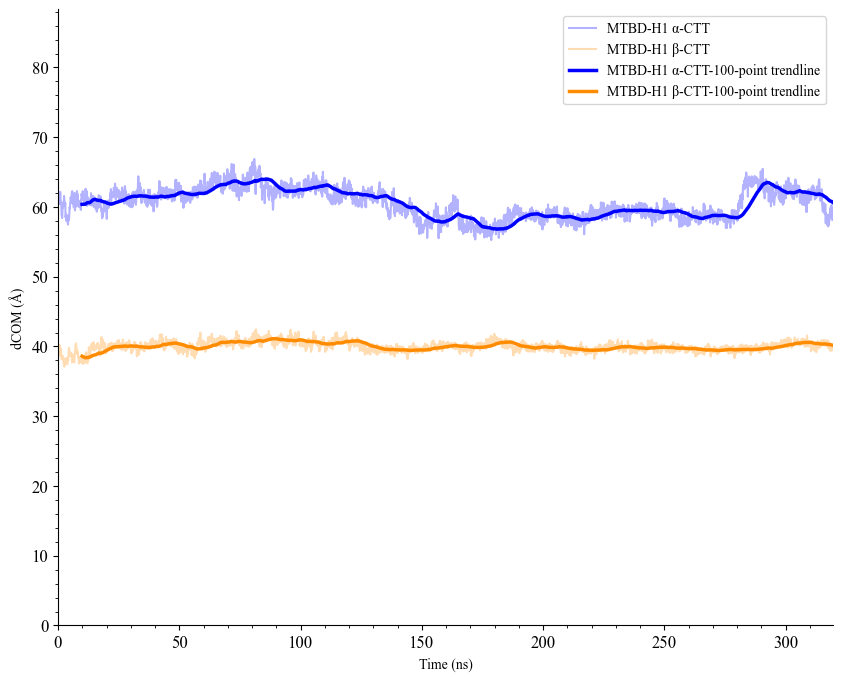

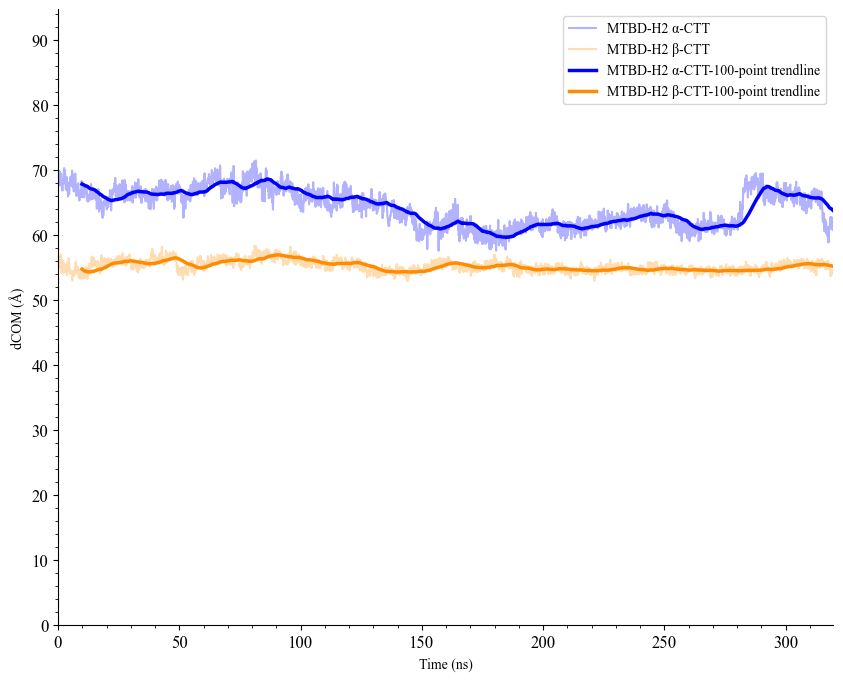

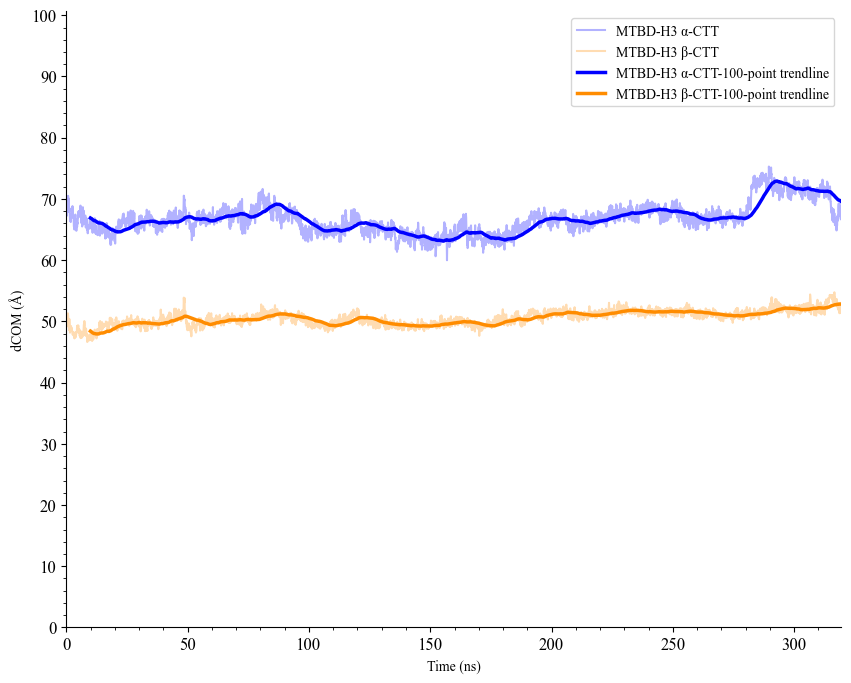

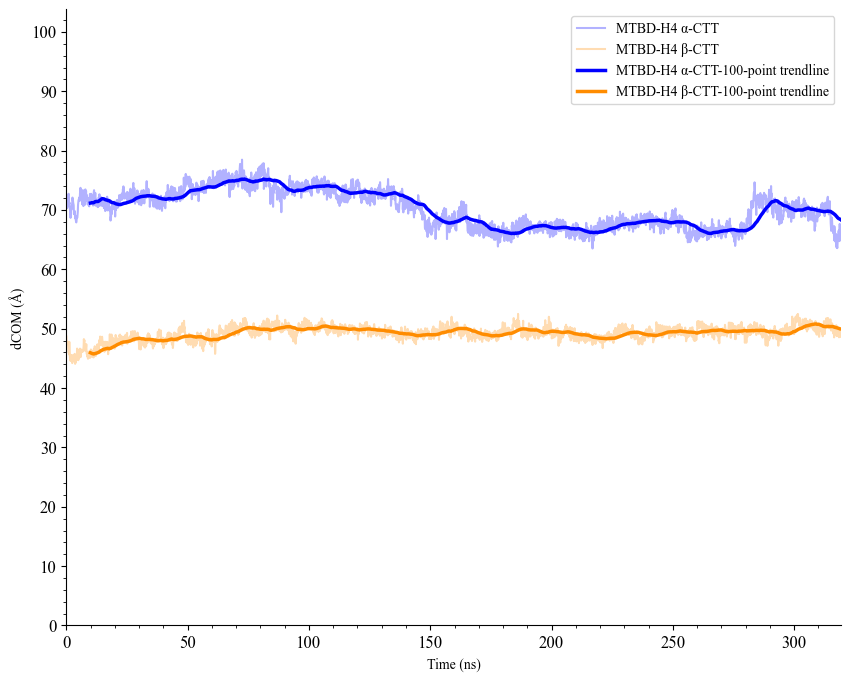

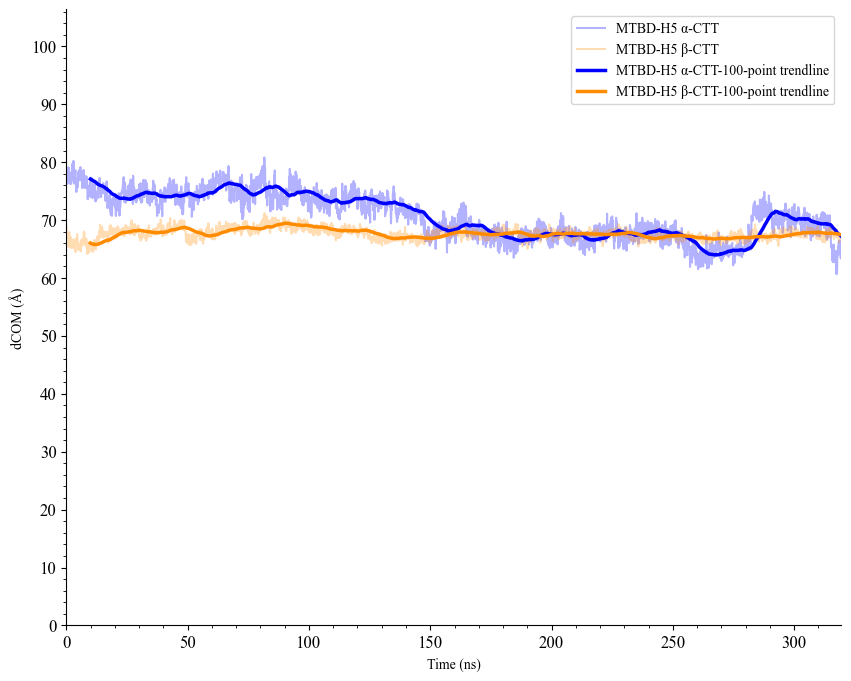

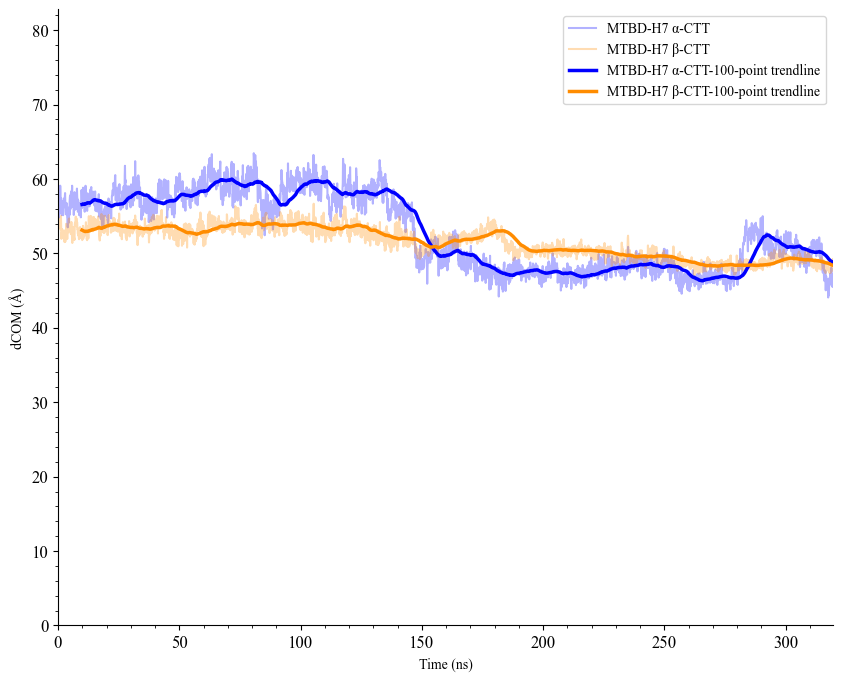

In [21]:
import matplotlib.ticker as ticker
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Times New Roman'


print('regular scale graphs')
# Append time to df
df['Time (ns)'] = time

# Smooth and plot DCOM for each selection
window_size = 100  # Change the window size to 100 for smoothing
for selection_name in mtbd_selections.keys():
    df['Smoothed ' + selection_name + ' Alpha DCOM (Å)'] = df[selection_name + ' Alpha DCOM (Å)'].rolling(window=window_size).mean()
    df['Smoothed ' + selection_name + ' Beta DCOM (Å)'] = df[selection_name + ' Beta DCOM (Å)'].rolling(window=window_size).mean()

    # Get maximum y value
    y_max = max(df['Smoothed ' + selection_name + ' Alpha DCOM (Å)'].max(), df['Smoothed ' + selection_name + ' Beta DCOM (Å)'].max()) * 1.15

    # Create the figure and axes
    fig, ax = plt.subplots()
    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('dCOM (Å)')
    ax.set_xlim(0, max(time))  # Set x-axis limits

    # Set figure size
    fig.set_size_inches(10, 8)

    # Set major and minor ticks
    ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(2))
    
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Turn off the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

      # Plot the original DCOM values using seaborn with reduced opacity
    sns.lineplot(x='Time (ns)', y=selection_name + ' Alpha DCOM (Å)', data=df, ax=ax, color='blue', alpha=0.3, label=selection_name + ' α-CTT')
    sns.lineplot(x='Time (ns)', y=selection_name + ' Beta DCOM (Å)', data=df, ax=ax, color='darkorange', alpha=0.3, label=selection_name + ' β-CTT')

    # Plot the smoothed DCOM values using seaborn with increased line width
    sns.lineplot(x='Time (ns)', y='Smoothed ' + selection_name + ' Alpha DCOM (Å)', data=df, ax=ax, label=selection_name + ' α-CTT-100-point trendline', color='blue', linewidth=2.5)
    sns.lineplot(x='Time (ns)', y='Smoothed ' + selection_name + ' Beta DCOM (Å)', data=df, ax=ax, label=selection_name + ' β-CTT-100-point trendline', color='darkorange', linewidth=2.5)

    # Set y-axis limits
    ax.set_ylim(0, y_max*1.20)

    # Show the legend
    legend = plt.legend(loc='upper right', bbox_to_anchor=(1,1), ncol=1)
    plt.setp(legend.get_texts(), color='black')
    plt.savefig(f"Final Graphs/{selection_name}__reg_CTT.png", dpi=300)
    # Show the plot
    plt.show()